# This is the first analysis of the csv file

## __Background__
In this lab, imagine that your team is hired by a health government agency. They would like to understand factors that predict cancer mortality rates, with the ultimate aim of identifying communities for social interventions, and of understanding which interventions are likely to have the most impact. Your team was hired to perform an exploratory analysis to help the agency address their goals.


## __Data__
You are given a dataset for a selection of US counties, “cancer.csv”. <br>The dependent (or target) variable in this data is named “deathRate”.
The labels of some of the variables are listed below; the rest of the variables should be self-explanatory.<br>
__*avgAnnCount*__: "2009-2013 mean incidences per county"<br>
__*povertyPercent*__: "Percent of population below poverty line"<br>
__*popEst2015*__: "Estimated population by county 2015"<br>
__*PctPrivateCoverage*__: "Percentage of the population with private insurance coverage"<br>
__*PctPublicCoverage*__: "Percentage of the population with public insurance coverage"<br>


## __Objective__
Perform an exploratory analysis to understand how county-level characteristics are related to cancer mortality.

# Brainstorm Questions

1) group by counties, what are the characteristics of the counties with higher death rate (add location on google map)? what do the counties with higher death rate have in common?

2) health insurance policies fairness and benefits

3) does income affect death rate (maybe combine with question 2)

4) average household size and death rate

5) birth rate, death rate / population total, normal distribution

6) low education level -> low income -> no insurance -> higher death rate

7) age level -> insurance choices -> death rate


Arjun: 2,3,4,5
Doug: 1,6,7

# Report Flow

how we cleaned up the data (sanity check, NA value, number vs. meaning, min, max, correlations)
- median age
- average house hold size
- average HS (high school) min values
- percentage white and black
- birth rate min

In [1]:
library(car)

Loading required package: carData


In [2]:
getwd()

[1] "C:/Users/Zeliang/w203_onC/Lab1_EDA/analysis"

In [3]:
data = read.csv("../project materials/cancer.csv", header = T)

In [4]:
head(data)

X,avgAnnCount,medIncome,popEst2015,povertyPercent,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,...,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,deathRate
1,1397,61898,260131,11.2,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",...,75.1,41.6,32.9,81.78053,2.5947283,4.8218571,1.8434785,52.85608,6.118831,164.9
2,173,48127,43269,18.6,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",...,70.2,43.6,31.1,89.22851,0.9691025,2.2462326,3.7413515,45.37250,4.333096,161.3
3,102,49348,21026,14.6,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",...,63.7,34.9,42.1,90.92219,0.7396734,0.4658982,2.7473583,54.44487,3.729488,174.7
4,427,44243,75882,17.1,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",...,58.4,35.0,45.3,91.74469,0.7826260,1.1613587,1.3626432,51.02151,4.603841,194.8
5,57,49955,10321,12.5,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",...,61.6,35.1,44.0,94.10402,0.2701920,0.6658304,0.4921355,54.02746,6.796657,144.4
6,428,52313,61023,15.6,"(51046.4, 54545.6]",45.4,43.5,48.0,"Mason County, Washington",...,60.0,32.6,43.2,84.88263,1.6532052,1.5380566,3.3146354,51.22036,4.964476,176.0


In [15]:
ls(data)
names(data)
dim(data)
summary(data)

[1] "avgAnnCount"          "AvgHouseholdSize"     "binnedInc"           
 [4] "BirthRate"            "deathRate"            "Geography"           
 [7] "MedianAge"            "MedianAgeFemale"      "MedianAgeMale"       
[10] "medIncome"            "PctAsian"             "PctBachDeg18_24"     
[13] "PctBachDeg25_Over"    "PctBlack"             "PctEmployed16_Over"  
[16] "PctEmpPrivCoverage"   "PctHS18_24"           "PctHS25_Over"        
[19] "PctMarriedHouseholds" "PctNoHS18_24"         "PctOtherRace"        
[22] "PctPrivateCoverage"   "PctPublicCoverage"    "PctSomeCol18_24"     
[25] "PctUnemployed16_Over" "PctWhite"             "PercentMarried"      
[28] "popEst2015"           "povertyPercent"       "X"

[1] "X"                    "avgAnnCount"          "medIncome"           
 [4] "popEst2015"           "povertyPercent"       "binnedInc"           
 [7] "MedianAge"            "MedianAgeMale"        "MedianAgeFemale"     
[10] "Geography"            "AvgHouseholdSize"     "PercentMarried"      
[13] "PctNoHS18_24"         "PctHS18_24"           "PctSomeCol18_24"     
[16] "PctBachDeg18_24"      "PctHS25_Over"         "PctBachDeg25_Over"   
[19] "PctEmployed16_Over"   "PctUnemployed16_Over" "PctPrivateCoverage"  
[22] "PctEmpPrivCoverage"   "PctPublicCoverage"    "PctWhite"            
[25] "PctBlack"             "PctAsian"             "PctOtherRace"        
[28] "PctMarriedHouseholds" "BirthRate"            "deathRate"

[1] 3047   30

       X           avgAnnCount        medIncome        popEst2015      
 Min.   :   1.0   Min.   :    6.0   Min.   : 22640   Min.   :     827  
 1st Qu.: 762.5   1st Qu.:   76.0   1st Qu.: 38883   1st Qu.:   11684  
 Median :1524.0   Median :  171.0   Median : 45207   Median :   26643  
 Mean   :1524.0   Mean   :  606.3   Mean   : 47063   Mean   :  102637  
 3rd Qu.:2285.5   3rd Qu.:  518.0   3rd Qu.: 52492   3rd Qu.:   68671  
 Max.   :3047.0   Max.   :38150.0   Max.   :125635   Max.   :10170292  
                                                                       
 povertyPercent               binnedInc      MedianAge      MedianAgeMale  
 Min.   : 3.20   (45201, 48021.6]  : 306   Min.   : 22.30   Min.   :22.40  
 1st Qu.:12.15   (54545.6, 61494.5]: 306   1st Qu.: 37.70   1st Qu.:36.35  
 Median :15.90   [22640, 34218.1]  : 306   Median : 41.00   Median :39.60  
 Mean   :16.88   (42724.4, 45201]  : 305   Mean   : 45.27   Mean   :39.57  
 3rd Qu.:20.40   (48021.6, 51046.4]: 305   3

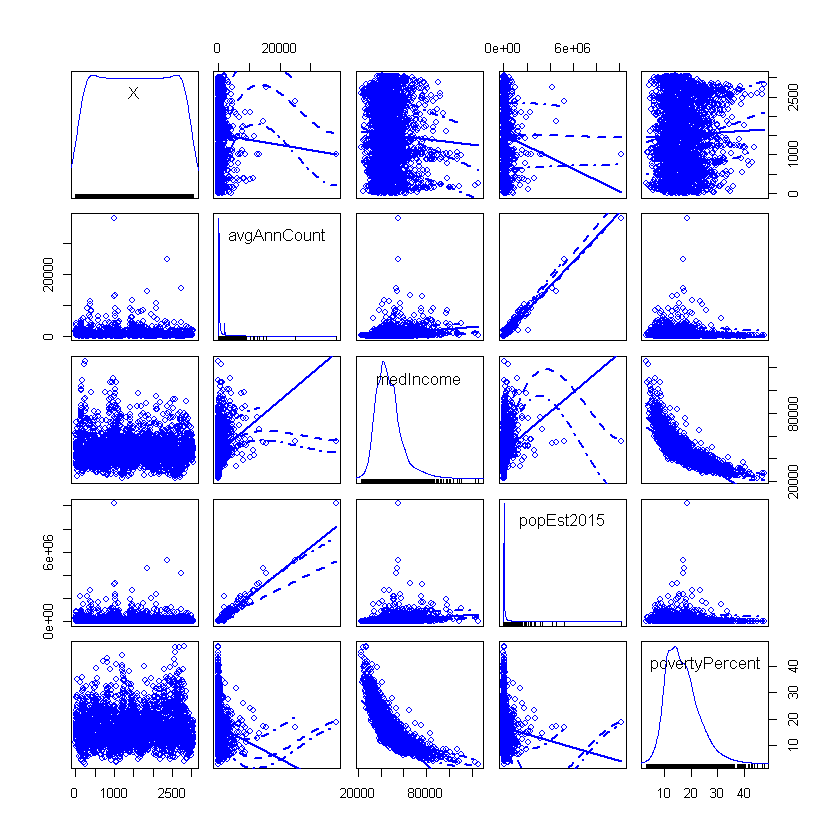

In [7]:
scatterplotMatrix(data[1:5])

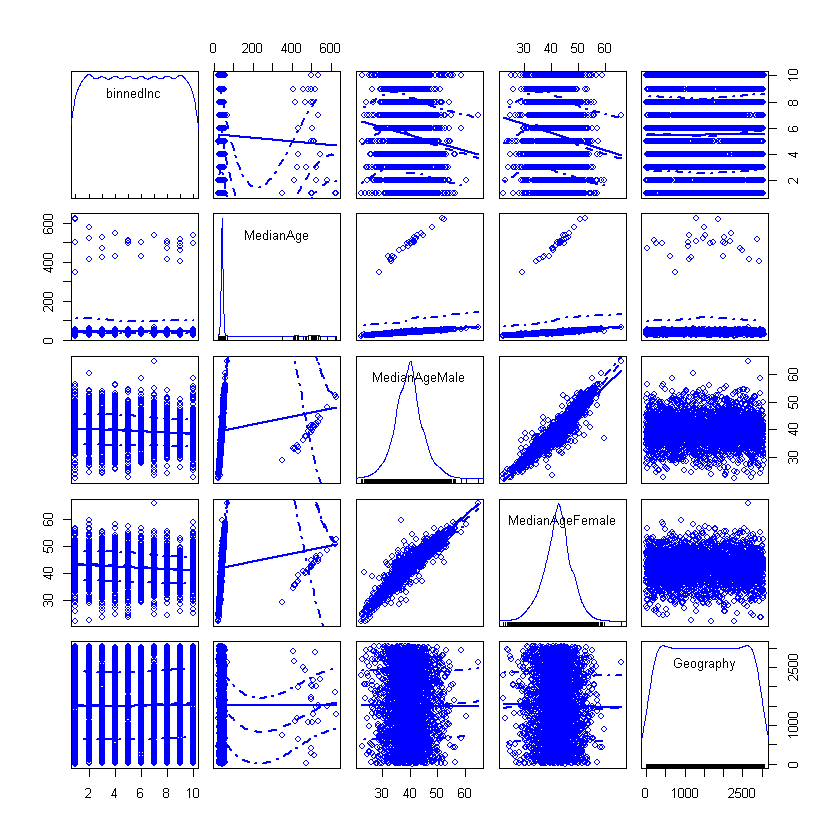

In [8]:
scatterplotMatrix(data[6:10])

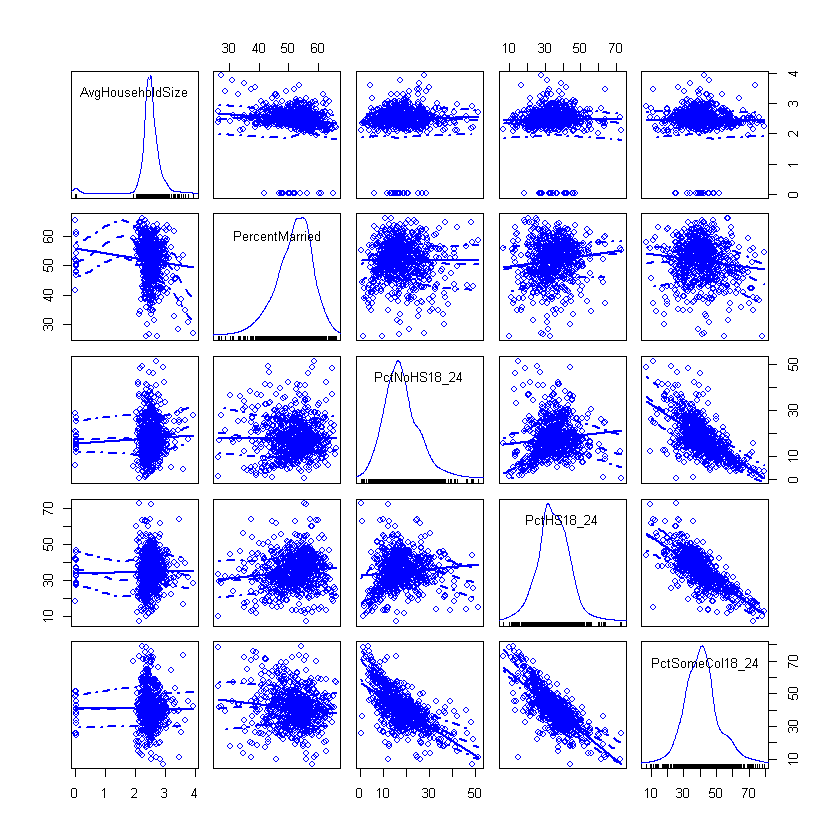

In [16]:
scatterplotMatrix(data[11:15])

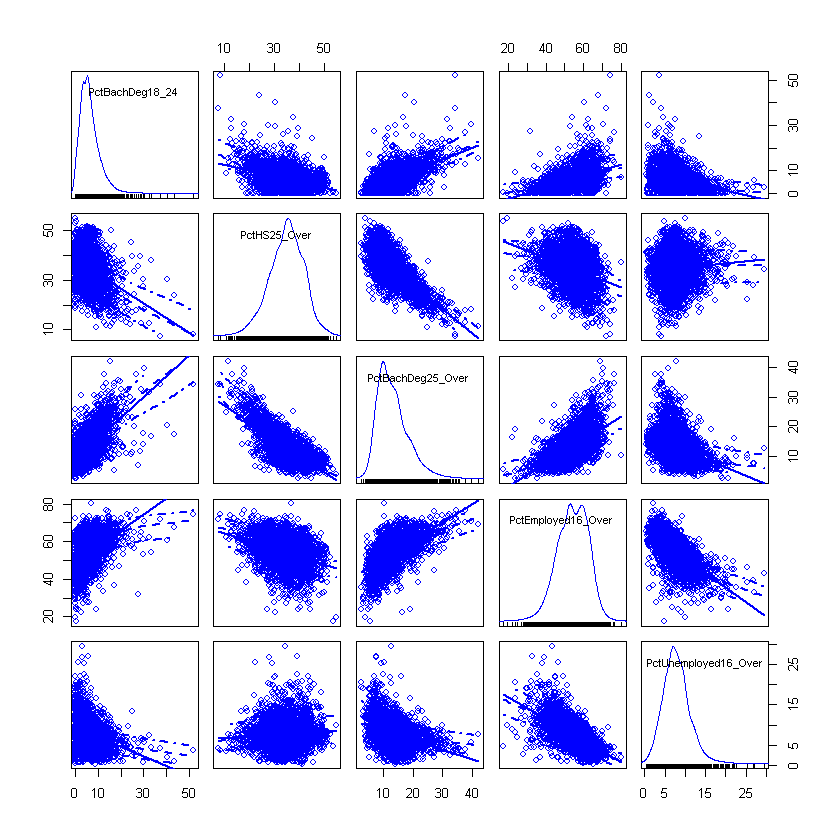

In [17]:
scatterplotMatrix(data[16:20])

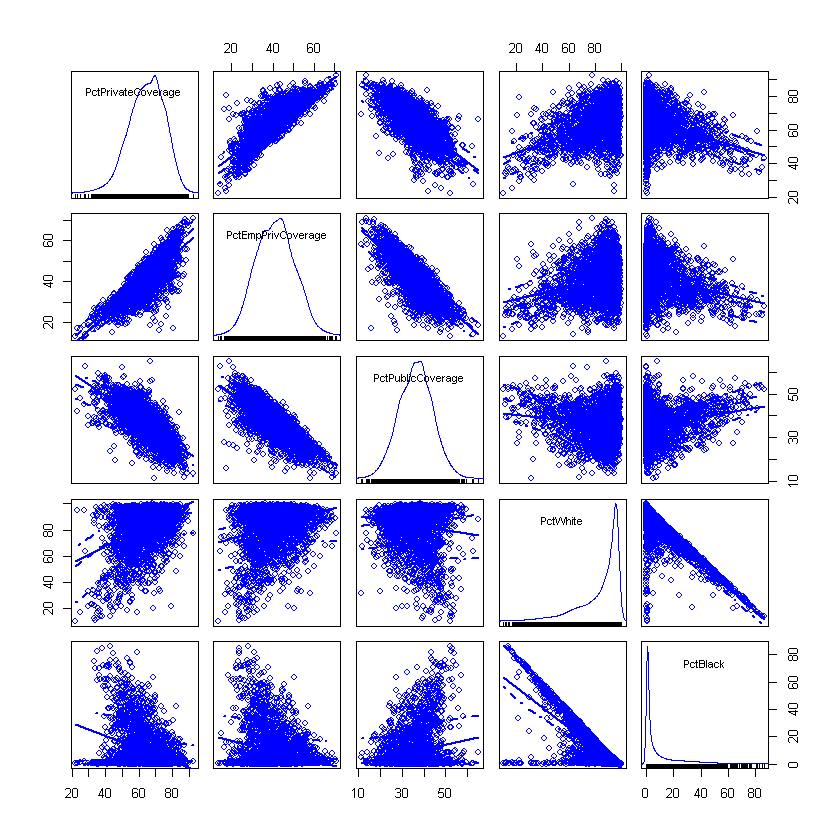

In [18]:
scatterplotMatrix(data[21:25])

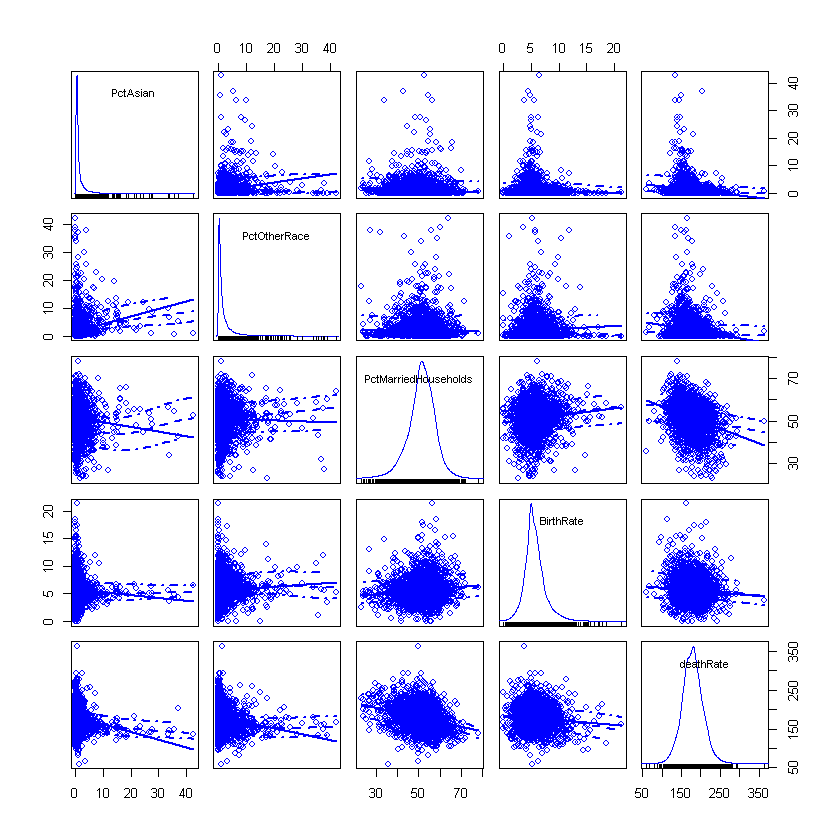

In [19]:
scatterplotMatrix(data[26:30])